# Finance Capstone Project 


This is project is an exploritory analysis of various stock prices. Using the pandas data reader, We will get stock information for the following banks:

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

We will get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 

## Gathering Data

In [35]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [8]:
# setting start and end dates for the stocks
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [9]:
# Using the data reader with yahoo.com to gather the stock data
BAC = data.DataReader("BAC",'yahoo',start,end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)

Yahoo includes an Adjusted Closing Price column which we will not be using for this analysis

In [10]:
BAC.drop('Adj Close',axis=1,inplace=True)
C.drop('Adj Close',axis=1,inplace=True)
GS.drop('Adj Close',axis=1,inplace=True)
JPM.drop('Adj Close',axis=1,inplace=True)
WFC.drop('Adj Close',axis=1,inplace=True)
MS.drop('Adj Close',axis=1,inplace=True)

In [13]:
# Set the ticker list for the bank abbreviations
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [14]:
# Adding all stocks together into a single dataframe
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.head()

BAC                                               \
                 High        Low       Open      Close      Volume   
Date                                                                 
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0   

                     C                                                 \
                  High         Low        Open       Close     Volume   
Date                                                                    
2006-01-03  493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04  491.000000  483.500000  488.600006  483.799988  1870900.0   
2006-01-05  487.799988  484.000000  484.399994  486.200012  1143100.0   
2006-01-06  489.000000  482.000000  488.799988  486.200012  1370200.0   
2006-01-09  487.399994  483.000000  486.000000  483.899994  1680700.0   

               ...             MS                                              \
               ...           High        Low       Open      Close     Volume   
Date           ...                                                              
2006-01-03     ...      58.490002  56.740002  57.169998  58.310001  5377000.0   
2006-01-04     ...      59.279999  58.349998  58.700001  58.349998  7977800.0   
2006-01-05     ...      58.590000  58.020000  58.549999  58.509998  5778000.0   
2006-01-06     ...      58.849998  58.049999  58.770000  58.570000  6889800.0   
2006-01-09     ...      59.290001  58.619999  58.630001  59.189999  4144500.0   

                  WFC                                               
                 High        Low       Open      Close      Volume  
Date                                                                
2006-01-03  31.975000  31.195000  31.600000  31.900000  11016400.0  
2006-01-04  31.820000  31.365000  31.799999  31.530001  10870000.0  
2006-01-05  31.555000  31.309999  31.500000  31.495001  10158000.0  
2006-01-06  31.775000  31.385000  31.580000  31.680000   8403800.0  
2006-01-09  31.825001  31.555000  31.674999  31.674999   5619600.0  

[5 rows x 30 columns]

In [15]:
# setting multi index column names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [16]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker           C                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0   
2006-01-06   489.000000  482.000000  488.799988  486.200012  1370200.0   
2006-01-09   487.399994  483.000000  486.000000  483.899994  1680700.0   

Bank Ticker     ...             MS                                   \
Stock Info      ...           High        Low       Open      Close   
Date            ...                                                   
2006-01-03      ...      58.490002  56.740002  57.169998  58.310001   
2006-01-04      ...      59.279999  58.349998  58.700001  58.349998   
2006-01-05      ...      58.590000  58.020000  58.549999  58.509998   
2006-01-06      ...      58.849998  58.049999  58.770000  58.570000   
2006-01-09      ...      59.290001  58.619999  58.630001  59.189999   

Bank Ticker                   WFC                                               
Stock Info      Volume       High        Low       Open      Close      Volume  
Date                                                                            
2006-01-03   5377000.0  31.975000  31.195000  31.600000  31.900000  11016400.0  
2006-01-04   7977800.0  31.820000  31.365000  31.799999  31.530001  10870000.0  
2006-01-05   5778000.0  31.555000  31.309999  31.500000  31.495001  10158000.0  
2006-01-06   6889800.0  31.775000  31.385000  31.580000  31.680000   8403800.0  
2006-01-09   4144500.0  31.825001  31.555000  31.674999  31.674999   5619600.0  

[5 rows x 30 columns]

## Data Analysis

I will begin the analysis and visually display the multi-level indexed stock data with the max close price for the time period (displayed in 2 different ways)

In [17]:
bank_stocks.xs(key ='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [30]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
    print('{} {:.2f}'.format(tick,bank_stocks[tick]['Close'].max()))

BAC 54.90
C 564.10
GS 247.92
JPM 70.08
MS 89.30
WFC 58.52


Create an empty dataframe to create a dataset for returns.

In [31]:
returns = pd.DataFrame

In [33]:
#creating returns dataframe
returns = bank_stocks.xs(key ='Close',axis=1,level='Stock Info').pct_change()

In [34]:
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Visualizing the returns data in a pairplot

<Figure size 432x288 with 0 Axes>

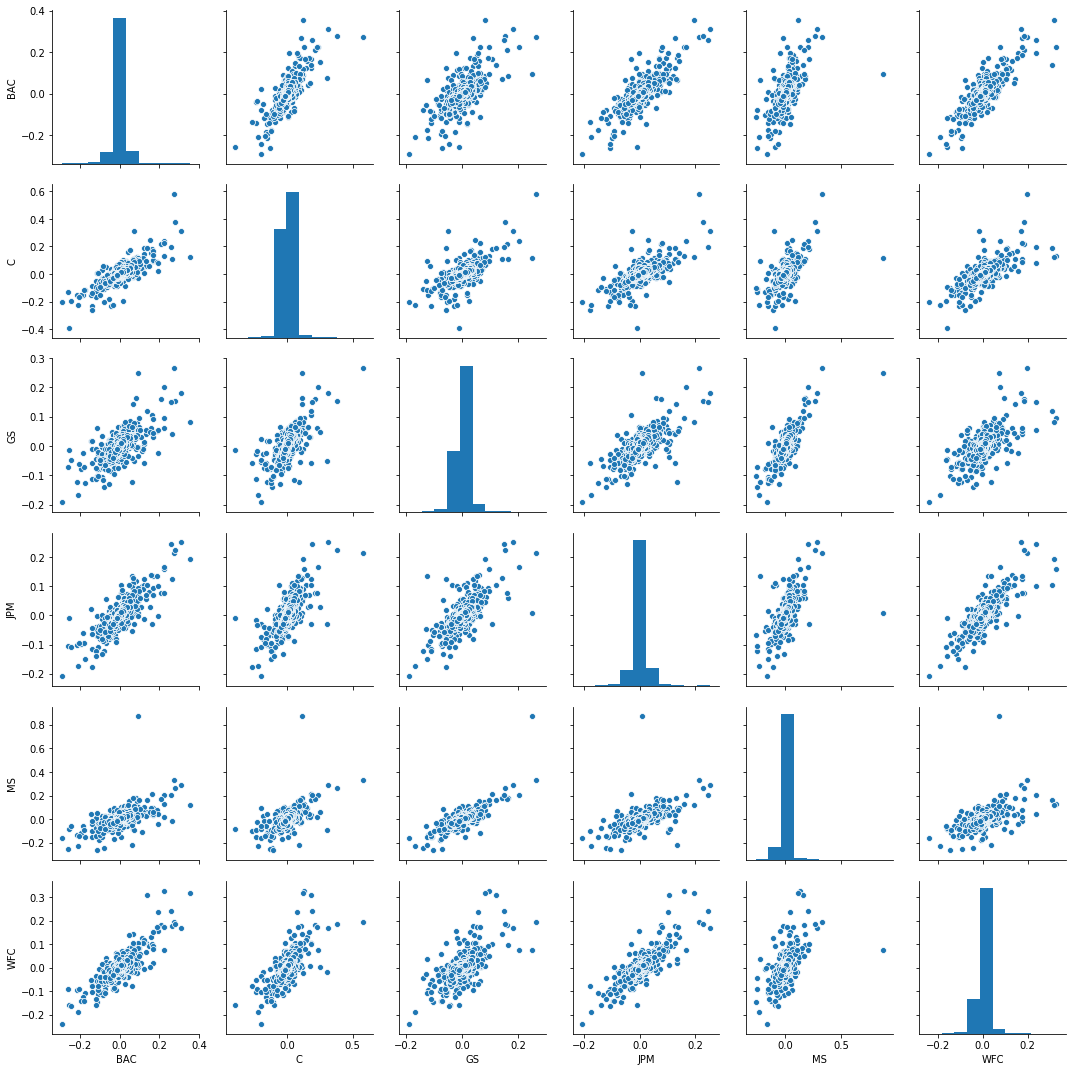

In [36]:
plt.tight_layout()
sns.pairplot(returns[1:])

Finding the single worst days and values for the stock returns 

In [37]:
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [38]:
returns.min()

Bank Ticker
BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.238223
dtype: float64

Many of stocks share the same date, January 20th 2009. After a quick google search, this is the date of President Barack Obama's inauguration.

Next looking at the best day for returns and the riskest stocks

In [39]:
# C Riskest
returns.std() 

Bank Ticker
BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [56]:
# Best Single Day Gain
# JPM day after inauguration 
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

Creating a distplot of Morgan Stanley's stocks from 2015

C:\Users\brock\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


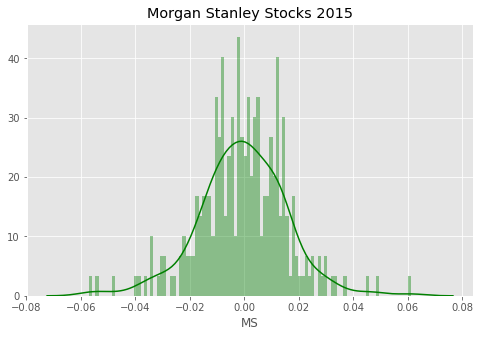

In [57]:
plt.figure(figsize=(8,5))
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS'], 
                  bins=100,color='green')
ax.set(title='Morgan Stanley Stocks 2015')
plt.style.use('ggplot')

2015 returns for CitiGroup

C:\Users\brock\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


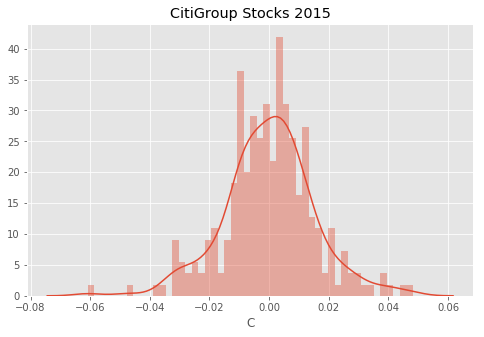

In [58]:
plt.figure(figsize=(8,5))
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C'],bins=50)
ax.set(title= 'CitiGroup Stocks 2015')
plt.style.use('ggplot')

## Additional Data Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [61]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker           C                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0   
2006-01-06   489.000000  482.000000  488.799988  486.200012  1370200.0   
2006-01-09   487.399994  483.000000  486.000000  483.899994  1680700.0   

Bank Ticker     ...             MS                                   \
Stock Info      ...           High        Low       Open      Close   
Date            ...                                                   
2006-01-03      ...      58.490002  56.740002  57.169998  58.310001   
2006-01-04      ...      59.279999  58.349998  58.700001  58.349998   
2006-01-05      ...      58.590000  58.020000  58.549999  58.509998   
2006-01-06      ...      58.849998  58.049999  58.770000  58.570000   
2006-01-09      ...      59.290001  58.619999  58.630001  59.189999   

Bank Ticker                   WFC                                               
Stock Info      Volume       High        Low       Open      Close      Volume  
Date                                                                            
2006-01-03   5377000.0  31.975000  31.195000  31.600000  31.900000  11016400.0  
2006-01-04   7977800.0  31.820000  31.365000  31.799999  31.530001  10870000.0  
2006-01-05   5778000.0  31.555000  31.309999  31.500000  31.495001  10158000.0  
2006-01-06   6889800.0  31.775000  31.385000  31.580000  31.680000   8403800.0  
2006-01-09   4144500.0  31.825001  31.555000  31.674999  31.674999   5619600.0  

[5 rows x 30 columns]

Using a line plot to show Close price for each bank for the entire index of time. 

In [62]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


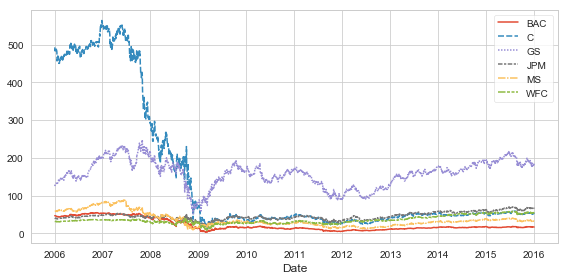

In [63]:
plt.figure(figsize=(8,4))
sns.lineplot(data=bank_stocks.xs(level='Stock Info',key='Close',axis=1),size=15)
plt.tight_layout()

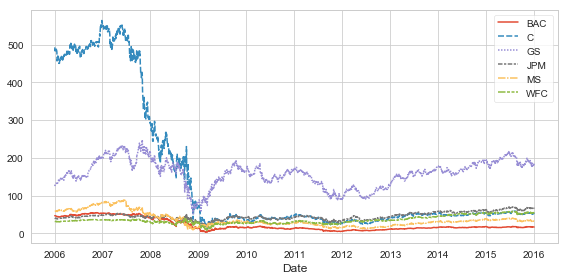

In [64]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=bank_stocks.xs(level='Stock Info',key='Close',axis=1))
plt.tight_layout()

In [65]:
#Using Iplotly to display the close prices
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Averages

Let's analyze the moving averages for these stocks in the year 2008. 

In [71]:
#BAC Rolling average vs the close price
BAC2008 = bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close']
rolling2008 = bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close'].rolling(window=30).mean()

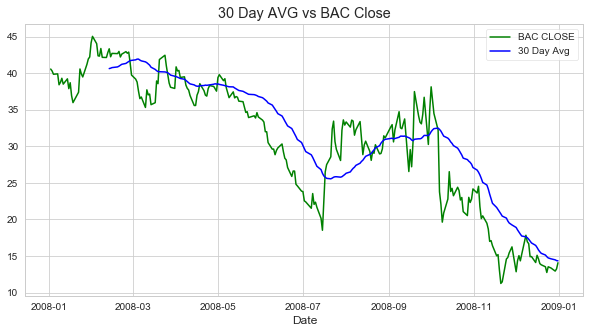

In [73]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data = BAC2008,color='green',label='BAC CLOSE')
ax = sns.lineplot(data=rolling2008,color='blue',label='30 Day Avg')
ax.set(title= '30 Day AVG vs BAC Close',xlabel='Date')
ax.legend
plt.show()

Next we will plot the correlation between the stocks Close Price.

In [74]:
bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


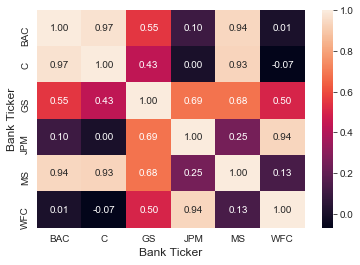

In [75]:
sns.heatmap(bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr(),
            fmt='.2f',annot=True,)

A cluster map to help us pin point relationships

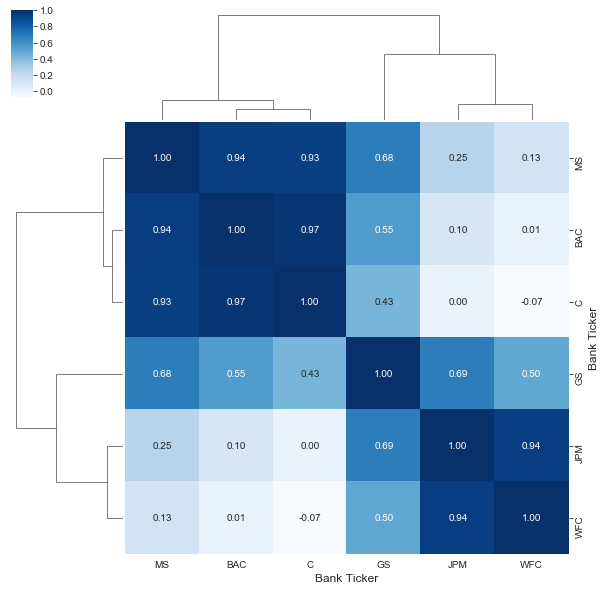

In [76]:
sns.clustermap(bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr(),
            fmt='.2f',annot=True,cmap='Blues')

## Advanced Plots 

Will take a look at interesting plots of the stock data, looking at the bank of America from 2015 to 2016.

In [77]:
#Candle plot to show daily changes
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [78]:
# Moving averages for Morgan Stanley stocks 2015-2016
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [79]:
# a Bollinger Band Plot for Bank of America for the year 2015.
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

That concludes this exploritory analysis of stock prices!